
## Summary: Calculates entropy of channel inputs and outputs 


In [22]:

## Output:

'''
    
    Table - frequencies

12   15   2    0    |29
4    21   10   0    |35
0    10   21   4    |35
0    2    15   12   |29
------------------------
16   48   48   16   |128

'''


'\n    \n    Table - frequencies\n\n12   15   2    0    |29\n4    21   10   0    |35\n0    10   21   4    |35\n0    2    15   12   |29\n------------------------\n16   48   48   16   |128\n\n'

In [23]:

'''

HX     = 1.811 bits
HY     = 1.994 bits
HXY    = 3.296 bits
HX+HY  = 3.805 bits
I(X,Y) = 0.509 bits
H(Y|X) = 1.484 bits


'''


'\n\nHX     = 1.811 bits\nHY     = 1.994 bits\nHXY    = 3.296 bits\nHX+HY  = 3.805 bits\nI(X,Y) = 0.509 bits\nH(Y|X) = 1.484 bits\n\n\n'

In [24]:

def col_totals(distribution):
    """Arguments:
            distribution:  a list of lists.  A 2D array.
       returns:
            totals:  list, the column totals of the passed distribution"""

    # Initialise the totals list
    totals = []

    # Loop for each column
    for col in range(len(distribution[0])):

        # Make a list of the values of column col of row
        # for each row in distribution."
        colvalues = [row[col] for row in distribution]

        # Store the sum of the column values
        totals.append(sum(colvalues))

    return totals


In [25]:

def row_totals(distribution):
    """Arguments:
            distribution:  a list of lists.  A 2D array.
       returns:
            totals:  list, the row totals of the passed distributizon"""

    # Make a list of the sum of each row for each row in the distribution.

    totals = [sum(row) for row in distribution]

    return totals



In [26]:

def flatten(distribution):
    """Arguments:
            distribution:  a list of lists.  A 2D array.
       returns:
            flatlist:  list, a 1D concatenation of the passed distribution"""

    flatlist = []                      # Initialise a flatlist
    for row in distribution:           # Loop for each row in the distribution
        for col in row:                # Loop for each column in the row
            flatlist.append(col)       # append the column value to flatlist

    return flatlist


In [27]:

def log2(posval):
    """Arguments:
            posval:  a postive number
       returns:
            result:  float, base 2 log of posval"""

    result = math.log(posval, 2)

    return result


In [28]:

def entropy_from_probabilities(probabilities):
    """Arguments:
            probabilities:  iterable, a probability distribution
       returns:
            HX:  float, the entropy of the passed distribution"""

    # Check we have a valid list of probabilities
    probabilities = valid_probabilities(probabilities)

    # Set entropy count to zero
    HX = 0

    # Loop over all probabilities and sum the entropy from each (Eq 2.52 P37)
    for px in probabilities:
        HX = HX + px * log2(1.0/px)

    return HX


In [29]:

def entropy_from_frequencies(frequencies):
    """Arguments:
            frequencies:  iterable, a frequency distribution
       returns:
            HX:  float, the entropy of the passed distribution"""

    # Transform the frequencies to probabilities. The probability of
    # an event is its frequency divided by the sum of all frequencies.

    sum_of_frequencies = sum(frequencies)

    # Make a list of : the probabilty for each frequency in the
    # list of frequencies.

    probabilities = [freq / float(sum_of_frequencies) for freq in frequencies]

    #
    # Now we have a probability distribution, we can find the entropy
    #
    HX = entropy_from_probabilities(probabilities)

    return HX


In [30]:

def valid_probabilities(distribution):
    """Arguments:
            distribution:  a list of probabilities.
       returns:
            probabilities, list of valid probabilities. It removes zero values.

    All values should be positive.  The sum of the
    probabilities should be equal to 1.0 to 2 decimal places. """

    # Check the probabilities sum to 1.00 to 2 decimal places
    if round(sum(distribution), 2) != 1.0:
        raise ValueError('Probabilities do not sum to 1')

    # Check we have no negative values
    if min(distribution) < 0:
        raise ValueError('Negative probability')

    # Make a list of the probabilities in distribution where
    # the probability is greater than zero
    probabilities = [p for p in distribution if p > 0]

    return probabilities


In [31]:

def strrounddp(num, decimal_p):
    """Arguments:
            num:  the number to round
            decimal_p: integer, the number of decimal places
       returns:
            result, string x rounded to p sig figs. """

    if num == "":
        result = "0." + "0" * decimal_p
    else:
        fmt = "%." + str(decimal_p) + "f"
        result = fmt % round(float(num), decimal_p)

    return result



## Main Loop


In [32]:

from matplotlib import pyplot
import math


In [33]:

# Our 4x4 frequency data
    

distribution = [[12, 15, 2, 0],
                [4, 21, 10, 0],
                [0, 10, 21, 4],
                [0, 2, 15, 12]]


In [34]:


col_total_frequencies = col_totals(distribution)  # Get col total freqs

row_total_frequencies = row_totals(distribution)  # Get row total freqs


In [35]:

allfrequencies = flatten(distribution)   # Make flat list of all freqs


In [36]:

# HX is the entropy of the input values (col totals)
    
HX = entropy_from_frequencies( col_total_frequencies )


In [37]:

# HY is the entropy of the output values (row totals)
    
HY = entropy_from_frequencies( row_total_frequencies )


In [38]:

# HXY is the entropy of the whole distribution

HXY = entropy_from_frequencies(allfrequencies)


In [39]:

# IXY Mutual information

IXY = HX + HY - HXY


In [40]:

# Prepare the probability table for display
    
tdat = [["y1"]  + distribution[0] + [row_total_frequencies[0]],
        ["y2"]  + distribution[1] + [row_total_frequencies[1]],
        ["y3"]  + distribution[2] + [row_total_frequencies[2]],
        ["y4"]  + distribution[3] + [row_total_frequencies[3]],
        ["Sum"] + col_total_frequencies + [sum(row_total_frequencies)]]


In [41]:

# Prepare the calculated entropy/MI/noise table for display

ents = [["H(X)", strrounddp(HX, 3), "a"],
        ["H(Y)", strrounddp(HY, 3), "b"],
        ["H(X,Y)", strrounddp(HXY, 3), "c"],
        ["H(X) + H(Y)", strrounddp(HX+HY, 3), "d"],
        ["I(X,Y)", strrounddp(IXY, 3), "mutual info"],
        ["H(noise)", strrounddp(HY - IXY, 3), "noise"]]


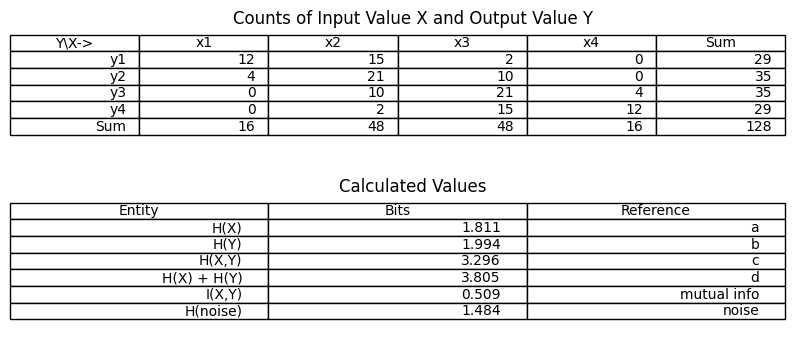

In [42]:


pyplot.figure("Example", figsize=(10, 4))
pyplot.subplot(2, 1, 1)
pyplot.title('Counts of Input Value X and Output Value Y')
pyplot.axis('off')
pyplot.table(cellText=tdat,
             colLabels=["Y\X->", "x1", "x2", "x3", "x4", "Sum"],
             colLoc='center',
             loc='best')

pyplot.subplot(2, 1, 2)
pyplot.title('Calculated Values')
pyplot.axis('off')
pyplot.table(cellText=ents,
             colLabels=["Entity", "Bits", "Reference"],
             colLoc='center',
             loc='best')

pyplot.show()
